This notebook suggests an approach for generating dynamicly kategorial data. The idea is, to define intial kategories as a small bag of unique elements with different behaviours and probabilities, that a behaviour will appear. (As an example: A behaviour is: elaborate this topic, and the probility according to the behaviour will result in a probaility a topic is elaborated. Another behaviour for example is the tendency for beeing used in different documents. The following UML activity diagram summatizes the algorithm.

(As a prototype this notebook will use random uniform distributions as functions). 

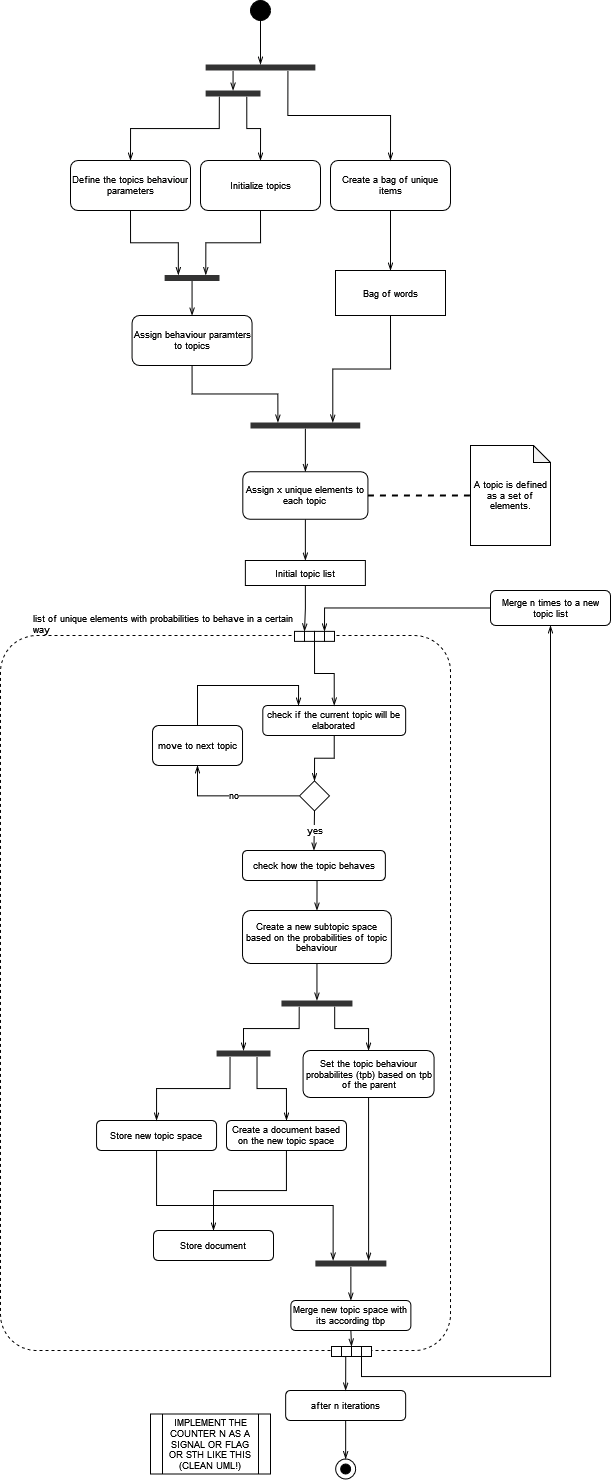

In [1]:
## First the needed bibliotheks and imports have to be set up
#!pip install numpy
#!pip install faker
#!...


##RENAME TEMPORARY VARIABLES WITH A t_ IN THE BEGINNING   

In [2]:
#this cell handles imports / set ups

##LIBRARIES

#"Faker is a Python package that generates fake data for you. " [from the Faker documentation]
#import faker library
from faker import Faker
#create an instance of Faker
fake = Faker()


import random as rnd
import numpy as np
import pandas as pd
import random as rng
import matplotlib.pyplot as plt



# Set the precision of decimals for the whole notebook on 2
np.set_printoptions(precision=3, suppress=True)

In [3]:
##THIS CELL CONTAINS SOME SIMPLE FUNCTIONS WHICH WILL BE USED MORE OFTEN IN THE PROGRAMM

#Declare a decision boundry function, to create a boundry value each time a decision is to be made**
def decide():
    decision_boundry = np.random.uniform(0,1,1)
    return decision_boundry

#Declare a function to let values vary along a uniform distribution around a given variation. This is a placeholder function for **
def uniform_variance(value, variation):
    low_boarder = value - value * variation
    top_boarder = value + value * variation
    
    value = np.random.uniform(low_boarder,top_boarder,1)
    return value

In [4]:
###GENERATE BAG OF UNIQUE ELEMENTS
##Set the size of the bag of unique Elements
    
#PUT LATER INTO "MAIN-CELL"
words_to_create = 150000

#This function takes an integer and returns a list of unique words which is the size of the given integer minus deletet doublicates 
def create_bag_of_words(word_amount_to_create):

    words = []

    words_created=0
    
    while words_created < word_amount_to_create:
        words.append(fake.word())
        words_created = words_created + 1 

    
    #check for duplikates
    unique_words = []
    double = 0
    for x in words:
        if x not in unique_words:
            unique_words.append(x)
        else:
            double=+1
    
    return unique_words
            
            
#CREATE A FUNCTION FOR FREQUENTLY USED WORDS (FOR SENTENCE GENERATION)
def create_bag_of_frequently_used_words():
    #Create a list of frequently used words
    frequently_used_words = []
    frequently_used_words.append(words[:100])
    del words[:100]
    
    return frequently_used_words


words = create_bag_of_words(words_to_create)
## Comment:
#Combination of frequently used words and 'normal' words to create sentences with topic words**

In [5]:
###INITIALIZE FIRST ROW OF TOPICS

##Create bag of x topics
topic_amount = 5

#This function takes an amount of topics as integer and returns a list of empty lists according to the amount
def initialize_empty_topics(amounts_of_topics):
    
    topics_to_create = amounts_of_topics

    ##Create empty list of initial topics
    topic_list_empty = []
    topics_created = 0
    while topics_created < topics_to_create:
        topic_list_empty.insert(0, [])
        topics_created += 1
    
    return topic_list_empty


topic_list_empty = initialize_empty_topics(topic_amount)

topic_list_empty

[[], [], [], [], []]

In [6]:
###INITIALIZE BEHAVIOURAL PROBABILITIES FOR EACH TOPIC

##This function takes an empty topic list and generate for each topic probabilities, different behaviours will occeu
##Note: The behaviours are implemented as fucntions which are called depending on a random decisionboundry for each 
##generation step and the in this function (initialize_topic_behaviour_parameters) stated probabilities. This 
##implementation aims to mimic tendencies for behaviours.
def initialize_topic_behaviour_parameters(empty_topic_list):

    for topic in empty_topic_list:
        
        
        #Initialize the behavioural parameters**
        topic_probability_is_elaborated = np.random.uniform(0,1,1)
        topic_probability_is_used = np.random.uniform(0,1,1)
        
        topic_probability_creates_new_word = np.random.uniform(0,0.3,1)
        topic_probability_uses_different_topic = np.random.uniform(0,0.3,1)
        #Setting the behavioural parameters here just with implemented with standard uniform distributions in a certain range
        #between 0 and 1. Refining these functions in future work could include changing behavioural probabilities depending 
        #on topic size and topic contents.
        
        
        behavioural_paramters = topic_probability_is_elaborated, topic_probability_is_used 
        #,topic_probability_creates_new_word, topic_probability_uses_different_topic
        
        #The parameters are stored in a tupel, so the tupel can be appended to 
        #a topic as behavioural probabilites and can alway be called as the
        #last item in the list of elements of a topic (topic words are inserted in first position)
        #This architecture is designed to support future implementations of different
        #behavioural paramters.
        
        topic.append(behavioural_paramters)
        

initialize_topic_behaviour_parameters(topic_list_empty)
topic_list_empty

[[(array([0.494]), array([0.598]))],
 [(array([0.934]), array([0.796]))],
 [(array([0.568]), array([0.849]))],
 [(array([0.667]), array([0.035]))],
 [(array([0.693]), array([0.189]))]]

In [7]:
###INITIALIZE KEYWORDS FOR EACH TOPIC

#State the low and top boarder for key words per topic
min_words_per_topic = 1 
max_words_per_topic = 5


#Define a function which will return a uniform distributed random** amount of keywords per topic, in the range of 
#min_words_per_topics to max_words_per_topic
def set_keywordamount_per_topic():
    topic_keywords = rnd.randint(min_words_per_topic, max_words_per_topic)
    return topic_keywords


#Define a function which will insert the initial keywords for every topic
def initialize_keywords_to_topic(empty_topic_list):
    for topic in empty_topic_list:
        keyword_amount = set_keywordamount_per_topic()
        keywords_inserted = 0
        while keywords_inserted < keyword_amount:
            #Append a unique word to the topic as a keyword of this topic
            topic.insert(0,words[keywords_inserted])
            #Delete the word out of the baggs of words to ensure, this entry won't be taken a second time
            del words[keywords_inserted]
            keywords_inserted = keywords_inserted +1
    return (empty_topic_list)

topic_list = initialize_keywords_to_topic(topic_list_empty)
# Print the keywords of each topic.
for topic in topic_list:
    print(topic)

['decide', 'citizen', (array([0.494]), array([0.598]))]
['cover', (array([0.934]), array([0.796]))]
['small', (array([0.568]), array([0.849]))]
['human', 'less', 'perform', 'present', 'goal', (array([0.667]), array([0.035]))]
['black', 'tend', (array([0.693]), array([0.189]))]


In [8]:
###SET OF FUNCTIONS FOR THE BEHAVIOUR OF WORD COMPOSITION FOR SUBTOPIC

##Each function is connected to each topic with the tuple holding propabilities of a topic, these probabilities are
##are the tendencies, that a behaviour (declared in the following function set) will appear. With this implementation
##behaviours (defined as functions) can be connected to topics with different tendencies to appear with probabilities.
##Note: To embedd a dynamicly working structure with different amounts of function inputs, future work should replace
##the tuple with (something like) a nested list which generates itself depending on the set of functions picked.
##Note: Each of these functions can call topic as the current list of keywords and probabilites of a topic as they are called
##in create_subtopic_space which is called in elaborate_topic_list on each topic of the given 

def creates_new_word(word):

    word = word + words[rnd.randint(0,20)]
    
    # If the word gets to long cut it at a random amount between 2 and 4
    if len(word)>15:
        word = word[-6:]
        #print(word[:5])
    return word



#def use_different_topic():
    

In [9]:
###CREATE A SUBTOPIC SPACE FOR TOPIC




#This function is called by elaborate_topic_list and takes a topic as a list of elements within this topic and the
#information of tendencies how the topic behaves as a tuple of probabilities and returns an elaboration of that topic,
#here called subtopic (a subtopic is an elaboration of a topic) with changed probabilities.
def create_subtopic_space(topic):
    
    t_subtopic = []
    
    
    #Set the amounts of words used in that subtopic
    subtopic_word_amount = rnd.randint(1,8)
    subtopic_words_picked = 0
    
    while subtopic_words_picked < subtopic_word_amount:
        
        
        #Always use a random word from the topic space for the subtopic
        position_word_elaborated = rnd.randint(0,len(topic)-2)
        #print(position_word_elaborated)
        
        t_subtopic.insert(0,topic[position_word_elaborated])
        #print(topic[position_word_elaborated])
        subtopic_words_picked += 1
        
        
        ##Check if a special behaviour for elaboration is triggered
        #Set the decision boundry new for each elaboration (doing so and not setting one decision boundry) for each
        #generation enables the behaviour of tendencies.
        decisionboundry = decide()
        
        #Maybe create a new word
        probability_merge_new_word = 0.3 #**
        if probability_merge_new_word > decisionboundry:
            #subtopic[0] uses the word which was just inserted
            new_word = creates_new_word(t_subtopic[0])
            #print(new_word)
            t_subtopic.insert(0,new_word)
            #print(subtopic)
            subtopic_words_picked += 1
            
        #Maybe bring a new word in topic space.. pending

        #Maybe use a topic from another topic space (parent generation) ...pending


    ##Vary the behaviour probabilities of each subtopic**
    sub_topic_paramter_1 = uniform_variance(topic[-1][0],0.1)
    sub_topic_paramter_2 = uniform_variance(topic[-1][1],0.1)
    subtopic_parameters = (sub_topic_paramter_1,sub_topic_paramter_2)
    t_subtopic.append(subtopic_parameters)

    
    #print(t_subtopic)
    #print(topic)
    return t_subtopic

In [10]:
###THIS CELL elaborates a given list of topics to a next generation of topic

#Create the list, where each subtopic generation will be stored  
topic_space_master = []

subtopic = []



#This function takes a list of topics, checks if the probability if a topic is elaborated and if yes, 
#calls create_subtopic_space on the current topic, takes the result and stores it as a sub topic in the subtopic_space.
#In the end the function appends the temporary subtopic_space to the global topic_space_master. (This implementation,
#let have each generation stored in an own list of lists with the most current once in the beginning)
def elaborate_topic_list(topic_list):

    subtopic_space = []
    for topic in topic_list:
        
        topic_counter = 0
        
        #This loop elaborates a topic dpeending on its probability to be elaborated until the decision_boundry will be
        #above the topic probability for being elaborated
        while True: 
            
            decision_boundry = decide()
            t_subtopic = []
            
            
            #subtopic_space = []
            if topic[-1][0][0] > decision_boundry:
                
                #Call the create_subtopic_space_function which returns a subtopic space for the topic including new elements and 
                #new behaviour parameters depending on the topic given as input and append it to the subtopic space.

                t_subtopic = create_subtopic_space(topic)
                print("t_subtopic created on topic")
                
                
                #Store the new generation
                subtopic_space.append(t_subtopic)
                #print(subtopic_space)
                #print("Appending subtopic")
                
                topic_counter += 1
                print (topic_counter)
                if topic_counter > 10:
                    break
            else:
                #print("Breaking while")
                break
    
    #print("Returning subtopic")
    #print(subtopic_space)
    #for t_subtopic in 
    #print(t_subtopic)
    return subtopic_space


In [11]:
###LAST CELL TO EXECUTE
###INITIALIZE GENERATOR OVER N GENERATIONS

#Set the amount of generations to create
amount_of_generations = 10

topic_space_master = []

#This function creates a given amount of generation by calling the elaborate_topic_list function
def start_generator(list_of_topics):
    #Insert the root topics to the master list
    topic_space_master.insert(0,list_of_topics)
    print("insert first gen0")
    
    #Initialize the new_topic_generation variable which is handed to the elaborate_topic_list function
    new_topic_generation = elaborate_topic_list(list_of_topics)
    topic_space_master.insert(0,new_topic_generation)
    print("insert first gen1")
    print(new_topic_generation)
    
    
    generations_created = 0
    while generations_created < amount_of_generations:
        
        new_topic_generation = elaborate_topic_list(new_topic_generation)
        
        topic_space_master.insert(0,new_topic_generation)
        
        generations_created += 1

    return topic_list


    ##HANDING NEW TOPIC SPACE TO THE NEXT ITERATION NEEDED.   

In [ ]:
topic_list_master = start_generator(topic_list)

insert first gen0
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
insert first gen1
[['cover', 'coverlawyer', 'cover', 'cover', 'cover', 'cover', 'cover', (array([0.972]), array([0.779]))], ['cover', 'cover', 'cover', 'cover', (array([0.882]), array([0.766]))], ['cover', 'cover', (array([1.016]), array([0.788]))], ['cover', 'cover', 'cover', 'coverbrother', 'cover', 'cover', (array([0.956]), array([0.805]))], ['cover', 'cover', (array([0.964]), array([0.833]))], ['coverface', 'cover', (array([0.884]), array([0.819]))], ['cover', 'cover', 'cover', (array([1.026])

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_su

t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subt

5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_sub

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_sub

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_sub

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subt

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_sub

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtop

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subt

3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_s

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subt

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtop

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subt

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_sub

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subto

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_sub

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subt

11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_s

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_sub

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_sub

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subt

5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subt

9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_sub

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_

5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_s

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_sub

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subt

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subt

7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subt

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_sub

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_su

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subt

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subt

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtop

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subt

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

t_subtopic created on topic
8
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_sub

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_sub

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subt

8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subto

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subt

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subt

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_

5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_

2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_su

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_sub

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subt

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_su

t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_s

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_su

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_s

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_su

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_su

6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_s

t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_su

6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_

t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_su

t_subtopic created on topic
6
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subt

t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_su

t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subt

t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subt

t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_sub

t_subtopic created on topic
1
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_sub

11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_

1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_

7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_

t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_subtopic created on topic
5
t_subtopic created on topic
6
t_subtopic created on topic
7
t_subtopic created on topic
8
t_subtopic created on topic
9
t_subtopic created on topic
10
t_subtopic created on topic
11
t_subtopic created on topic
1
t_subtopic created on topic
2
t_subtopic created on topic
3
t_subtopic created on topic
4
t_su

In [ ]:
#test_topic_list = test_topic_list

In [ ]:
#gen1 = elaborate_topic_list(test_topic_list)

In [ ]:
#gen1

In [ ]:
#gen2 =  elaborate_topic_list(gen1)
#gen2

In [ ]:
topic_list_master